In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ballmdr', api_key='oSgf6vHed7evuaiXDdBb')

import fxcmpy
con = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')

def z(df):
    return (df - df.mean()) / df.std()

def getFig(symbol_focus):
    mean = np.mean(newdf[symbol_focus]['Close_z'])
    sd = np.std(newdf[symbol_focus]['Close_z']) * 3
    tripplesd = sd + mean
    tripplesd2 = mean - sd
    fig = {
        'data': [{
            'type': 'box',
            'y': newdf[symbol_focus]['Close_z'],
            'box': { 'visible': True },
            'line': { 'color': 'black' },
            'meanline': { 'visible': True },
            'fillcolor': '#8dd3c7',
            'opacity': 0.6,
            'x0': symbol_focus
        }],
        'layout': {
            'title': symbol_focus,
            'yaxis': { 'zeroline': False },
            'shapes': [
                # Line Horizontal
                {
                    'type': 'line',
                    'opacity': 0.7,
                    'x0': 0.5,
                    'y0': newdf[symbol_focus].iloc[-1]['Close_z'],
                    'x1': 1,
                    'y1': newdf[symbol_focus].iloc[-1]['Close_z'],
                    'line': {
                        'color': 'rgb(50, 171, 96)',
                        'width': 4,
                        'dash': 'dashdot',
                    },
                },
                {
                    'type': 'line',
                    'opacity': 0.7,
                    'x0': 0.5,
                    'y0': tripplesd,
                    'x1': 1,
                    'y1': tripplesd,
                    'line': {
                        'color': 'red',
                        'width': 4,
                        'dash': 'dashdot',
                    },
                },
                {
                    'type': 'line',
                    'opacity': 0.7,
                    'x0': 0.5,
                    'y0': tripplesd2,
                    'x1': 1,
                    'y1': tripplesd2,
                    'line': {
                        'color': 'red',
                        'width': 4,
                        'dash': 'dashdot',
                    },
                }
            ]
        }
    }
    return fig

In [55]:
con.get_accounts().T

,0
accountId,1041561
accountName,01041561
balance,49486
dayPL,-504.329
equity,49495.7
grossPL,9.66084
hedging,Y
mc,N
mcDate,
ratePrecision,0


In [56]:
order = con.create_market_buy_order('USD/JPY', 200)

In [57]:
order = con.create_market_sell_order('EUR/JPY', 200)

In [58]:
if (len(con.get_open_positions()) > 0):
    print('have')
else:
    print('not have')

have


In [43]:
all_pos = con.get_open_positions()
all_pos.T

,0,1
accountId,1041561,1041561
accountName,01041561,01041561
amountK,200,200
close,110.82,125.776
com,0,0
currency,USD/JPY,EUR/JPY
currencyPoint,18.0461,18.0461
grossPL,23.4615,120.909
isBuy,True,False
isDisabled,False,False


In [44]:
con.close_trade(trade_id=67556436)

TypeError: close_trade() missing 1 required positional argument: 'amount'

In [50]:
order = con.create_market_buy_order('EUR/USD', 100)

In [59]:
if order:
    print('success')
else:
    print('not success')

success


In [61]:
print(order)

accountId:        1041561
accountName:      01041561
amountK:          200
buy:              0
currency:         EUR/JPY
currencyPoint:    18.05299
expireDate:       
isBuy:            False
isELSOrder:       False
isEntryOrder:     False
isLimitOrder:     False
isNetQuantity:    False
isStopOrder:      False
limit:            0
limitPegBaseType: -1
limitRate:        0
ocoBulkId:        0
orderId:          138194289
range:            0
sell:             125.783
status:           In Process
stop:             0
stopMove:         0
stopPegBaseType:  -1
stopRate:         0
time:             2019-02-26 07:14:21.166000
timeInForce:      FOK
type:             OM



In [70]:
def hasCurrency(con, symbol):
    i = 0
    for i in range(len(con.open_pos)):
        trade_id = con.get_open_trade_ids()[i]
        pos = con.get_open_position(trade_id)
        print('%s == %s' % (symbol, pos.get_currency()))
        if symbol == pos.get_currency():
            return True
    return False

In [72]:
print(hasCurrency(con, 'USD/JPY'))

USD/JPY == USD/JPY
True


In [23]:
len(con.open_pos)

2

In [76]:
from pathlib import Path
print(Path)
import os
print(os.getcwd())

<class 'pathlib.Path'>
/Users/ballmdr/blockchain-python/FXCM


In [78]:
pos.get_amount()

200

In [40]:
i = 0
for i in range(len(con.open_pos)):
    print(i)
    trade_id = con.get_open_trade_ids()[i]
    print(trade_id)
    pos = con.get_open_position(trade_id)
    print(pos.get_isBuy())
    i += 1

0
67556436
True
1
67556437
False


In [14]:
con.close_all()

In [2]:
def getRP(price, symbol, stoploss):
    exchange = {
        'USD': 1,
        'JPY': 0.00904702,
        'CAD': 0.755954,
        'CHF': 0.997029,
        'GBP': 1.29598,
        'NZD': 0.684647,
        'AUD': 0.715733
    }
    point = 10000
    pipval = 10/100
    rp = (price - stoploss) * point * pipval
    s = symbol.split('/')
    rp = rp * exchange[s[1]]
    return rp

In [6]:
symbols = ['USD/CHF', 'USD/JPY', 'EUR/CHF', 'NZD/CHF']
pos = dict()
pos[symbols[0]] = 1.00122
pos[symbols[1]] = 110.846
pos[symbols[2]] = 1.13609
pos[symbols[3]] = 0.68998

In [7]:
df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='D1', number=252) #1 Years
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2
    df[symbol]['Close_z'] = z(df[symbol]['Close'])

USD/CHF Zone [stop@4SD]
zone1: $62.0
zone2: $62.0
zone3: $41.0
zone4: $21.0
Total RP: $186.0


USD/JPY Zone [stop@4SD]
zone1: $85.0
zone2: $82.0
zone3: $55.0
zone4: $27.0
Total RP: $249.0


EUR/CHF Zone [stop@4SD]
zone1: $121.0
zone2: $101.0
zone3: $67.0
zone4: $34.0
Total RP: $323.0


NZD/CHF Zone [stop@4SD]
zone1: $104.0
zone2: $104.0
zone3: $69.0
zone4: $35.0
Total RP: $312.0




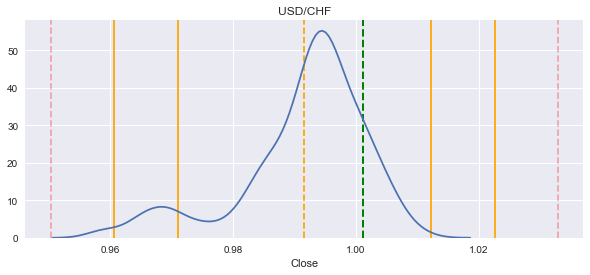

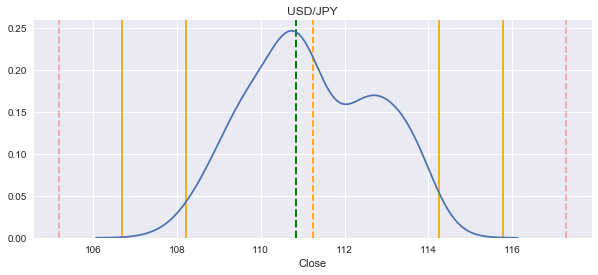

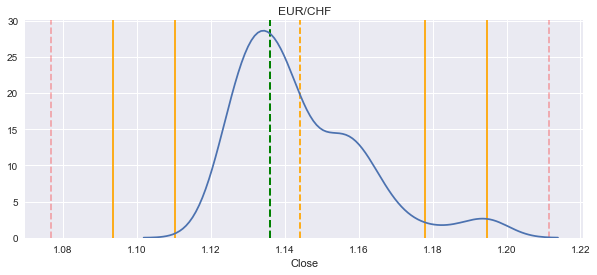

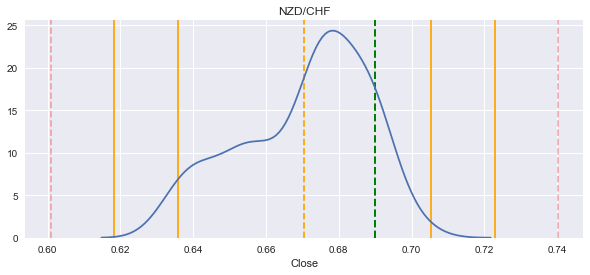

In [8]:

for symbol in symbols:
    
    mean = np.mean(df[symbol]['Close'])
    sd = np.std(df[symbol]['Close'])
    high = np.max(df[symbol]['askhigh'])
    low = np.min(df[symbol]['asklow'])
     
    plt.figure(figsize=(10,4))
    plt.axvline(x=pos[symbol], color='green', linestyle='--', linewidth=2)
    plt.axvline(x=mean, color='orange', linestyle='--')
    plt.axvline(x=mean+sd*2, color='orange')
    plt.axvline(x=mean-sd*2, color='orange')
    plt.axvline(x=mean+sd*3, color='orange')
    plt.axvline(x=mean-sd*3, color='orange')
    plt.axvline(x=mean+sd*4, color='red', linestyle='--', alpha=0.3)
    plt.axvline(x=mean-sd*4, color='red', linestyle='--', alpha=0.3)
    plt.title(symbol)
    

    zone = [0, 1, 2, 3]
    bullet_zone = 1
    stoploss = mean-sd*4
    print(symbol + ' Zone [stop@4SD]')
    #print("swap: \n" + str(symbol_swap.loc[symbol]))
    zone[0] = round(getRP(high, symbol, stoploss),0 )
    zone[1] = round(getRP(mean+sd*2, symbol, stoploss), 0)
    zone[2] = round(getRP(mean, symbol, stoploss), 0)
    zone[3] = round(getRP(mean-sd*2, symbol, stoploss), 0)
    for i in range(4):    
        print("zone" + str(i+1) + ": $" + str(zone[i] * bullet_zone))
    
    z = np.array(zone)
    print("Total RP: $" + str(z.sum() * bullet_zone))
    
    
    print("\n")
        
    sns.distplot(df[symbol]['Close'], hist=False)

## Sell

In [8]:
symbols = ['EUR/USD', 'EUR/AUD']
pos = dict()
pos[symbols[0]] = 1.13331
pos[symbols[1]] = 1.58311

df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='D1', number=252) #1 Years
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2
    df[symbol]['Close_z'] = z(df[symbol]['Close'])

EUR/USD Zone [stop@4SD]
zone1: $23.0
zone2: $38.0
zone3: $77.0
zone4: $115.0
Total RP: $253.0


EUR/AUD Zone [stop@4SD]
zone1: $24.0
zone2: $54.0
zone3: $109.0
zone4: $163.0
Total RP: $350.0




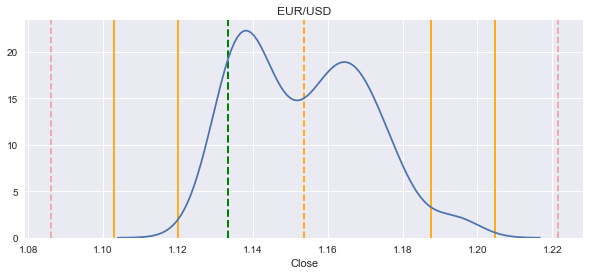

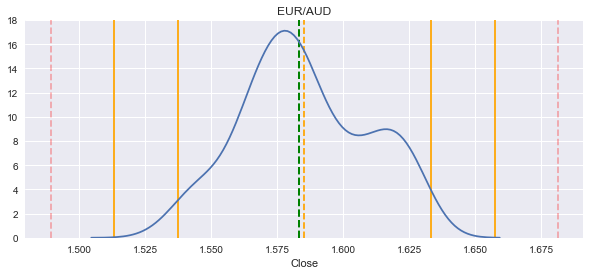

In [9]:
def getRPSell(price, symbol, stoploss):
    exchange = {
        'USD': 1,
        'JPY': 0.00904702,
        'CAD': 0.755954,
        'CHF': 0.997029,
        'GBP': 1.29598,
        'NZD': 0.684647,
        'AUD': 0.715733,
        'EUR': 1.13209
        
    }
    point = 10000
    pipval = 10/100
    rp = (stoploss - price) * point * pipval
    s = symbol.split('/')
    rp = rp * exchange[s[0]]
    return rp


for symbol in symbols:
    
    mean = np.mean(df[symbol]['Close'])
    sd = np.std(df[symbol]['Close'])
    high = np.max(df[symbol]['askhigh'])
    low = np.min(df[symbol]['asklow'])
     
    plt.figure(figsize=(10,4))
    plt.axvline(x=pos[symbol], color='green', linestyle='--', linewidth=2)
    plt.axvline(x=mean, color='orange', linestyle='--')
    plt.axvline(x=mean+sd*2, color='orange')
    plt.axvline(x=mean-sd*2, color='orange')
    plt.axvline(x=mean+sd*3, color='orange')
    plt.axvline(x=mean-sd*3, color='orange')
    plt.axvline(x=mean+sd*4, color='red', linestyle='--', alpha=0.3)
    plt.axvline(x=mean-sd*4, color='red', linestyle='--', alpha=0.3)
    plt.title(symbol)
    

    zone = [0, 1, 2, 3]
    bullet_zone = 1
    stoploss = mean+sd*4
    print(symbol + ' Zone [stop@4SD]')
    #print("swap: \n" + str(symbol_swap.loc[symbol]))
    zone[0] = round(getRPSell(high, symbol, stoploss),0 )
    zone[1] = round(getRPSell(mean+sd*2, symbol, stoploss), 0)
    zone[2] = round(getRPSell(mean, symbol, stoploss), 0)
    zone[3] = round(getRPSell(mean-sd*2, symbol, stoploss), 0)
    for i in range(4):    
        print("zone" + str(i+1) + ": $" + str(zone[i] * bullet_zone))
    
    z = np.array(zone)
    print("Total RP: $" + str(z.sum() * bullet_zone))
    
    
    print("\n")
        
    sns.distplot(df[symbol]['Close'], hist=False)